## Random Forest model for PCOS Dataset (cleaned data)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTENC
from sklearn.feature_selection import RFE, RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve, recall_score, f1_score, precision_score

### Import Dataset

In [9]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(572, 39)
(106, 39)
(572, 1)
(106, 1)


,Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),...,Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Blood Group_A+,Blood Group_A-,Blood Group_B+,Blood Group_O+,Menstrual Cycle(R/I)_irregular,Menstrual Cycle(R/I)_regular
0,1.212838,1.138042,1.784158,0.512320,2.088819,-1.974369,1.714235,1,1.032154,-0.155302,...,1.206324,0.540522,-1.930875,1.224986,1.0,0.0,0.0,0.0,1.0,0.0
1,1.212838,-0.738207,-0.519094,-0.729579,1.608630,0.007810,1.303924,0,-0.413545,-0.194309,...,-1.252294,0.540522,-0.733442,-0.937186,0.0,0.0,1.0,0.0,0.0,1.0
2,0.670140,-0.713840,-0.519094,0.512320,1.008395,0.668536,1.098769,1,-0.413545,0.542465,...,-0.358251,-1.333144,-1.332158,-1.612865,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.415256,-1.152443,2.551909,0.512320,-0.072028,0.007810,-1.157939,1,-0.413545,2.727182,...,-0.358251,1.343521,1.362066,-1.342594,0.0,0.0,1.0,0.0,0.0,1.0
4,1.031939,1.138042,2.551909,1.754218,0.048019,0.007810,1.303924,0,-0.413545,-0.194309,...,-0.805273,1.611188,0.763349,0.324081,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,-1.500652,0.391513,0.471164,-0.729579,-0.295301,0.007810,-1.069735,1,-0.413545,-0.194309,...,1.655484,-0.262478,-0.263431,0.954284,1.0,0.0,0.0,0.0,0.0,1.0
568,-1.663973,0.035117,0.211353,0.391636,1.690291,-1.845955,-0.932848,0,-0.413545,-0.194309,...,1.494994,0.057211,0.135542,0.665662,0.0,0.0,0.0,0.0,1.0,0.0
569,-0.777055,-0.014873,2.375315,1.276096,-0.293518,0.007810,-0.794817,0,-0.413545,-0.194307,...,0.122313,0.602089,1.016314,-0.443158,0.0,0.0,0.0,0.0,1.0,0.0
570,1.393738,0.017166,1.784158,0.512320,-0.552216,-0.633201,1.098769,0,-0.413545,-0.190567,...,0.982813,0.545846,-0.419196,2.860747,0.0,0.0,0.0,1.0,1.0,0.0


### Building Random Forest Classifier

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_pred, y_test))

c:\Users\Stacy\anaconda\envs\dsa4262_pcos\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test Accuracy: 0.8867924528301887


### Hyperparameter Tuning

In [11]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation ROC AUC:", grid_search.best_score_)

rf_best = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\Stacy\anaconda\envs\dsa4262_pcos\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation ROC AUC: 0.9788343362944566


### Model Evaluation

AUC score:  0.9685457516339869
New Model Test Accuracy: 0.8867924528301887


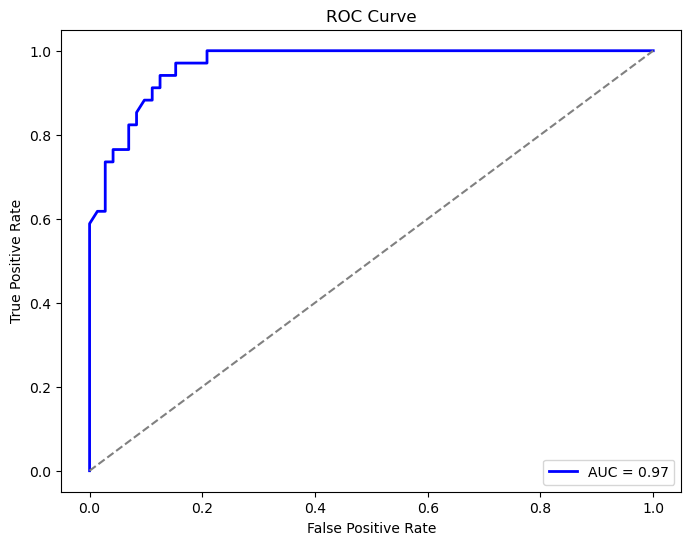

In [12]:
y_pred_best = rf_best.predict(X_test)
y_probs = rf_best.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

print("AUC score: ", roc_auc)
print("New Model Test Accuracy:", accuracy_score(y_test, y_pred_best))

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], color='gray', linestyle="--")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Finding Best Threshold & Model Evaluation

Best threshold: 0.4798265895953757
Accuracy:  0.8962264150943396
Precision:  0.7804878048780488
Recall/Sensitivity:  0.9411764705882353
F1 Score:  0.8533333333333334
Specificity:  0.875


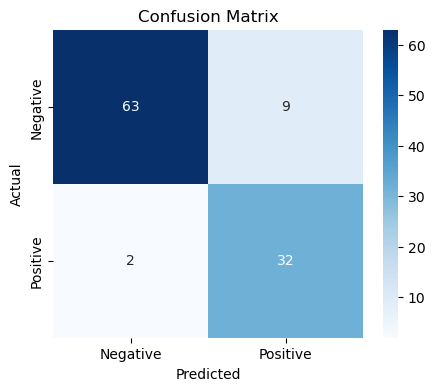

In [13]:
distances = np.sqrt((1 - tpr) ** 2 + fpr ** 2)
best_thresh = thresholds[np.argmin(distances)]
print(f"Best threshold: {best_thresh}")

y_pred_best = [1 if prob >= best_thresh else 0 for prob in y_probs]
print("Accuracy: ", accuracy_score(y_test, y_pred_best))
print("Precision: ", precision_score(y_test, y_pred_best))
print("Recall/Sensitivity: ", recall_score(y_test, y_pred_best))
print("F1 Score: ", f1_score(y_test, y_pred_best))
print("Specificity: ", recall_score(y_test, y_pred_best, pos_label=0))

cm = confusion_matrix(y_test, y_pred_best)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()